In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("student_data.csv")
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


#Data Cleaning

In [3]:
df.drop(columns="Unnamed: 0",axis=1,inplace=True)

#Exploring Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [5]:
df.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [6]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


#Analyzing Relationships

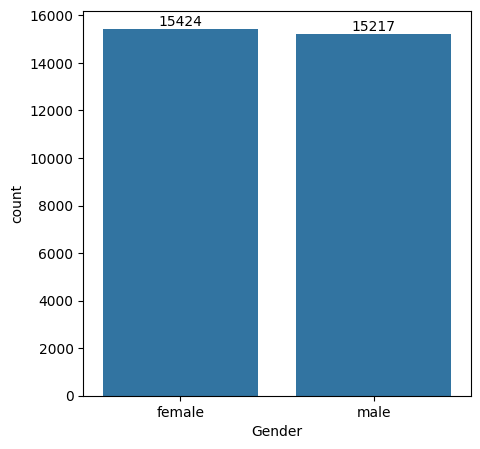

In [7]:
plt.figure(figsize=(5,5))
cntplt=sns.countplot(data=df,x="Gender")
cntplt.bar_label(cntplt.containers[0])
plt.show()

From above countplot we can say that there is 15424 female and 15217 male

In [8]:
gp1=df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gp1

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


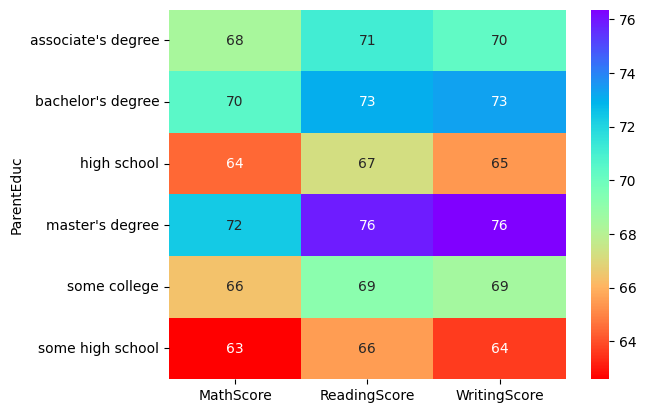

In [9]:
sns.heatmap(data=gp1,cmap="rainbow_r",annot=True)
plt.show()

From above heatmap we can say that parents education can afffect child's Result.

In [10]:
gp2=df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gp2

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


In [11]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

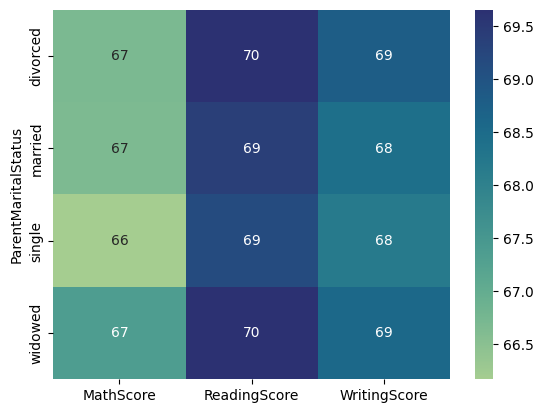

In [12]:
sns.heatmap(data=gp2,cmap="crest",annot=True)
plt.show()

From above heatmap we can say that parent Marital Status is not affecting child's result

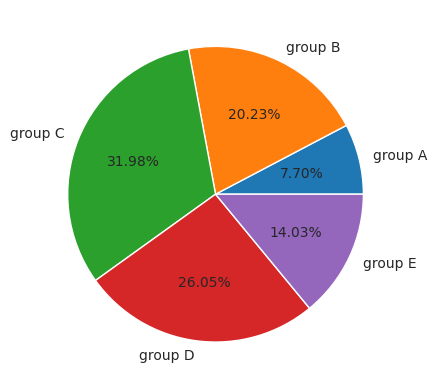

In [13]:
g1=df.loc[df["EthnicGroup"]=="group A"].count()
g2=df.loc[df["EthnicGroup"]=="group B"].count()
g3=df.loc[df["EthnicGroup"]=="group C"].count()
g4=df.loc[df["EthnicGroup"]=="group D"].count()
g5=df.loc[df["EthnicGroup"]=="group E"].count()
value_list=[g1["EthnicGroup"],g2["EthnicGroup"],g3["EthnicGroup"],g4["EthnicGroup"],g5["EthnicGroup"]]
lbl=["group A","group B","group C","group D","group E"]
sns.set_style("darkgrid")
plt.pie(value_list,labels=lbl,autopct="%1.2f%%")
plt.show()

From above piechart we can say that group c students are more as compare with others groups

<Axes: title={'center': 'WritingScore'}, ylabel='WritingScore'>

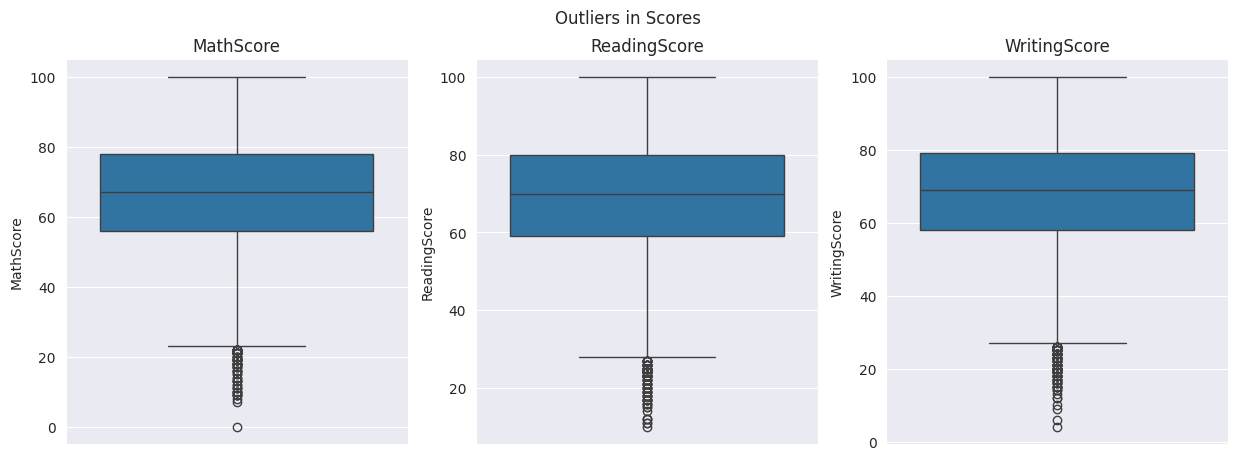

In [21]:
plt.figure(figsize=(15,5))
plt.suptitle("Outliers in Scores")

plt.subplot(1,3,1)
plt.title("MathScore")
sns.boxplot(data=df,y="MathScore")

plt.subplot(1,3,2)
plt.title("ReadingScore")
sns.boxplot(data=df,y="ReadingScore")

plt.subplot(1,3,3)
plt.title("WritingScore")
sns.boxplot(data=df,y="WritingScore")

In [15]:
gp3=df.groupby("TestPrep").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gp3

,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.54666,73.732998,74.703265
none,64.94877,67.051071,65.092756


In [16]:
gp4=df.groupby("PracticeSport").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gp4

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


Practicing sprot is not more affecting student's result

In [17]:
gp5=df.groupby("WklyStudyHours").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gp5

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


In [18]:
gp6=df.groupby("TransportMeans").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gp6

,MathScore,ReadingScore,WritingScore
TransportMeans,,,
private,66.511354,69.472364,68.509593
school_bus,66.674636,69.446206,68.492351


In [19]:
gp7=df.groupby("IsFirstChild").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gp7

,MathScore,ReadingScore,WritingScore
IsFirstChild,,,
no,66.246832,69.132614,68.210887
yes,66.740646,69.542553,68.558484


In [20]:
gp8=df.groupby("NrSiblings").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gp8

,MathScore,ReadingScore,WritingScore
NrSiblings,,,
0.0,66.819449,69.547812,68.746515
1.0,66.473896,69.259097,68.245345
2.0,66.554934,69.472018,68.522533
3.0,66.719092,69.488159,68.650498
4.0,66.245495,69.144169,68.073444
5.0,66.630303,69.453788,68.282576
6.0,65.917219,68.801325,67.860927
7.0,67.615120,69.828179,68.986254


<Axes: ylabel='LunchType'>

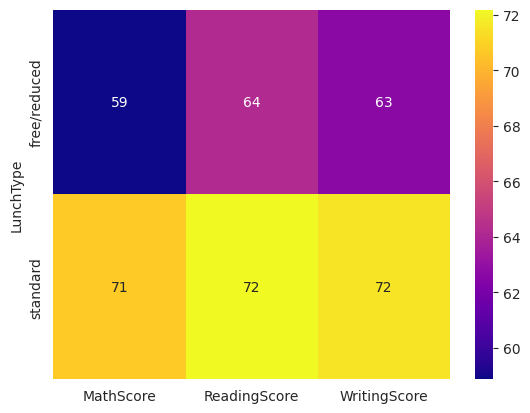

In [30]:
gp9=df.groupby("LunchType").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
sns.heatmap(data=gp9,cmap="plasma",annot=True)

From above heatmap we can say that score of student's who eat standard lunch is more as compare with the other students.

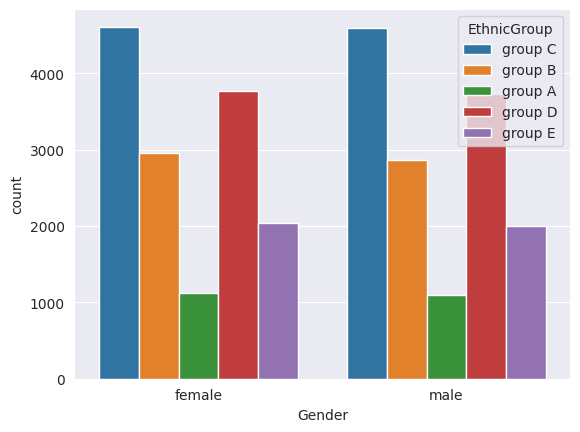

In [40]:
sns.countplot(data=df,x="Gender",hue="EthnicGroup")
plt.show()